# 🤖 AI-Powered Resume Analysis  

## 📌 Project Overview   
This tool analyzes resumes using **both rule-based scoring and machine learning validation** to:  
- 🔍 **Rank candidates** into tiers (A/B/C) based on skills, experience, and education  
- 📊 **Surface top talent** while filtering out unqualified applicants.

## 📊 Dataset Information  
- **Name:** Resume Dataset
- **Source:** [Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset)  
- **Format:** CSV (Comma-Separated Values)  
- **Objective:** Predict candidate quality without manual review

### 🔹 Features in the Dataset:  
- `Category` – Job role.
- `Resume` – Raw text of resumes.

## 🏗️ Project Workflow  
### Phase 1: Category Classification  
1. **Data Preprocessing** – Cleaning text, handling missing values, and removing stopwords.  
2. **Feature Engineering** – Using techniques like TF-IDF. 
3. **Model Training** – Experimenting with machine learning algorithms such as Logistic Regression, Random Forest, and SVC.  
4. **Evaluation** – Measuring model accuracy, precision, recall, and F1-score to determine effectiveness. 

### Phase 2: Resume Analysis  
1. **Data Preprocessing** – Extracted structured sections (Education, Experience, Skills, etc) using regex.
2. **Feature Engineering** – Extract important information and calculated numeric scores.
3. **Rule-Based Scoring** – Combined features with HR-aligned weights.
4. **Evaluation** – Tier distribution analysis (A/B/C tiers).

## 🛠️ Tools & Libraries    
- Python (Pandas, NumPy, Scikit-learn, re)
- Natural Language Processing (SpaCy)  
- Jupyter Notebook for interactive coding  
  
## 🎯 Goal   
**Reduce time-to-hire by:**
- Automating initial resume screening
- Surfacing the top candidates instantly
- Providing data-driven hiring analytics.
---  
✏️ *Next Steps:* Load the dataset and explore its structure!  


Checking for missing values :
Category    0
Resume      0
dtype: int64


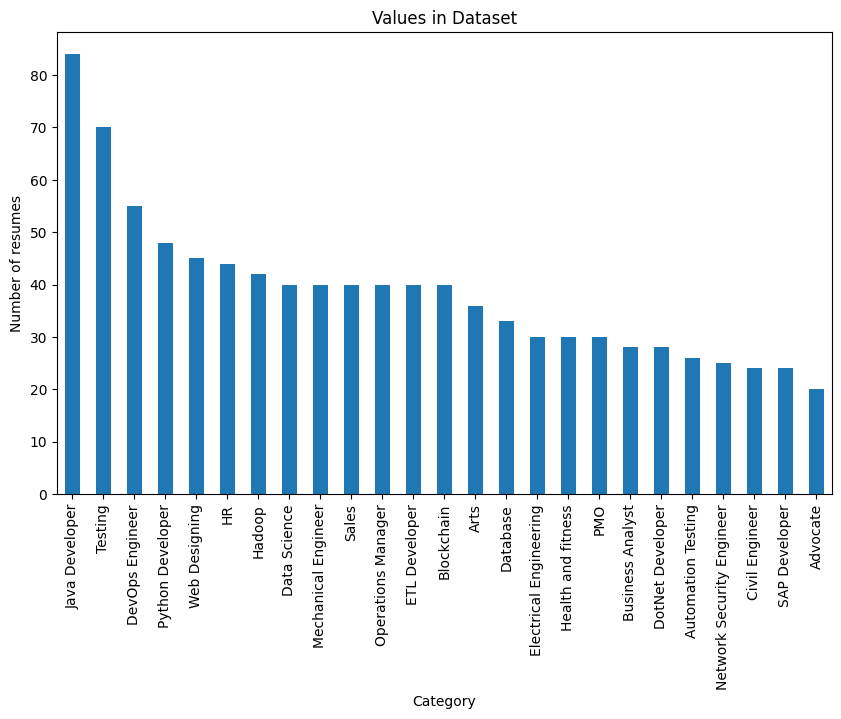

Category                                             Resume
344      Java Developer  TECHNICAL SKILLS Programming Languages: Java (...
381      Java Developer  TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...
351      Java Developer  Education Details \r\nJanuary 2013 Master of E...
778              Hadoop  Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...
277  Health and fitness  Education Details \r\nJanuary 1992 to January ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load the sataset
data = pd.read_csv('resumeData.csv')

# Shuffle the dataset to mix the categories
data = shuffle(data, random_state = 42)

# Missing values - No missing values found, so no imputation or removal needed
print('Checking for missing values :')
missing_values = data.isnull().sum()
print(missing_values)

# Display the categories
categories = data['Category'].value_counts()
categories.plot(kind = 'bar', figsize = (10, 6))
plt.title('Values in Dataset')
plt.xlabel('Category')
plt.ylabel('Number of resumes')
plt.show()

# Display the first few rows of the dataset
data.head()

## 🔹 Phase 1: Category Classification

## 📝 Text Preprocessing  
To improve model accuracy, we clean the text data by:
- Keeping degree abbreviations
- Retaining meaningful stopwords
- Removing only excessive punctuation
- Keeping capitalization for named entities.
- Removing extra spaces

This step ensures that only meaningful words remain for further analysis.


In [2]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# Download required NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_resume(resume):
    """
    Cleans the resumes by:
        1. Keeping degree abbreviations (B.E., M.Sc., Ph.D.).
        2. Retaining meaningful stopwords like "of" in university names.
        3. Removing only excessive punctuation (not within words).
        4. Keeping capitalization for named entities.

    Args:
        resume (str): The resume to be cleaned.
    Returns:
        str: The cleaned resume.
    """
    # Step 1: Keep dots in degree names (e.g., "B.E.", "Ph.D.")
    resume = re.sub(r"(?<!\w)\.(?!\w)", "", resume)

    # Step 2: Remove special characters except necessary ones
    resume = re.sub(r"[^\w\s.\-]", "", resume)  

    # Step 3: Remove extra spaces
    resume = re.sub(r"\s+", " ", resume).strip()

    # Step 4: Keep capitalization for university and degree names
    return resume

# Apply the cleaning function to the Resume column
data['cleaned_resume'] = data['Resume'].apply(clean_resume)

# Display the first few rows of the cleaned resume
print("cleaned resume: ")
print(data[['Resume', 'cleaned_resume']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


cleaned resume: 
                                                Resume  \
344  TECHNICAL SKILLS Programming Languages: Java (...   
381  TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...   
351  Education Details \r\nJanuary 2013 Master of E...   
778  Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...   
277  Education Details \r\nJanuary 1992 to January ...   

                                        cleaned_resume  
344  TECHNICAL SKILLS Programming Languages Java Se...  
381  TECHNICALSKILLS SpringMVC Hibernate JDBC Java ...  
351  Education Details January 2013 Master of Engin...  
778  Skill Set Hadoop Map Reduce HDFS Hive Sqoop ja...  
277  Education Details January 1992 to January 2003...  


## ☁️ Word Cloud Visualization  
Word clouds provide an intuitive way to observe the most frequently used words in each category.  
- Larger words indicate higher frequency.  
- Helps identify common patterns in each category.  


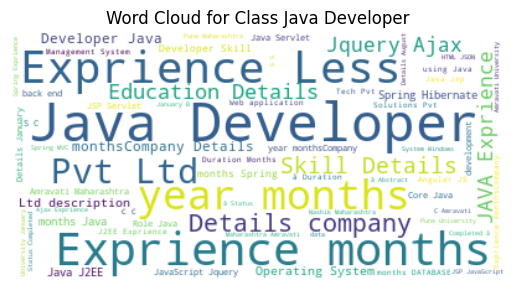

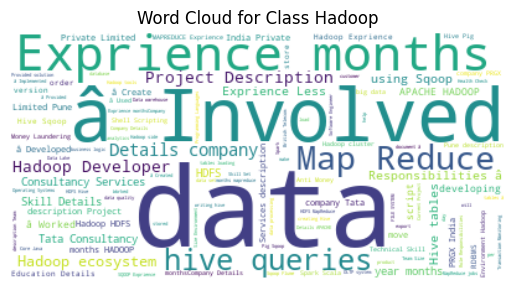

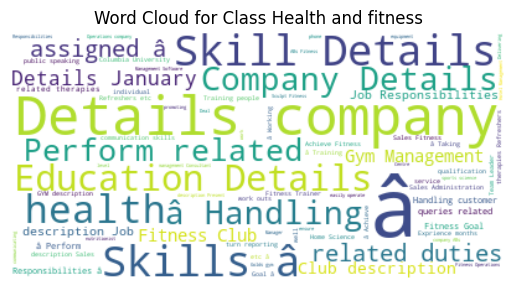

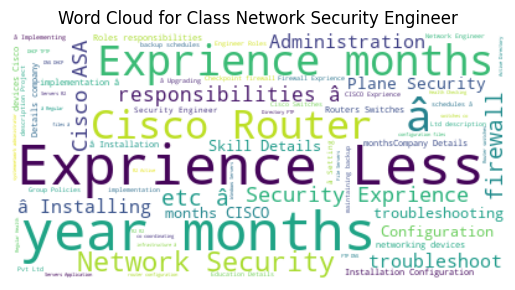

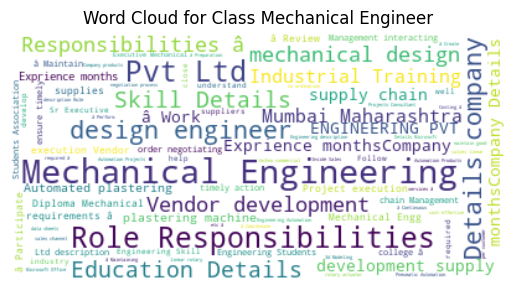

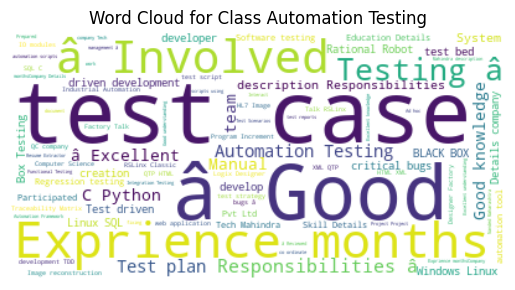

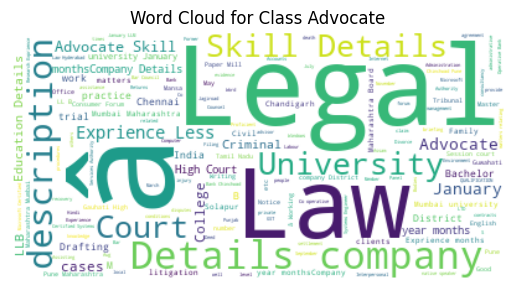

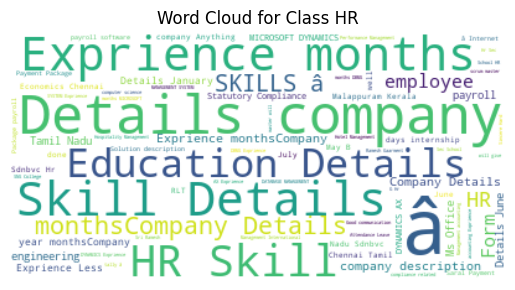

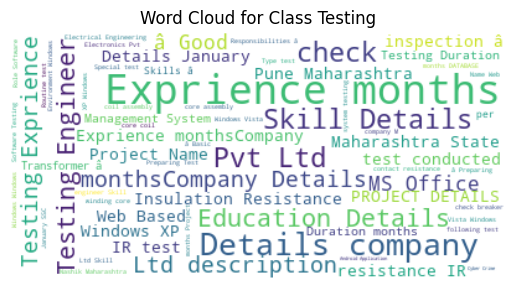

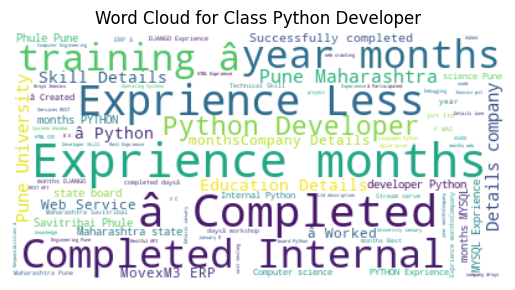

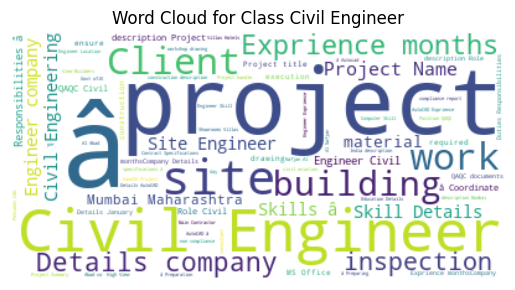

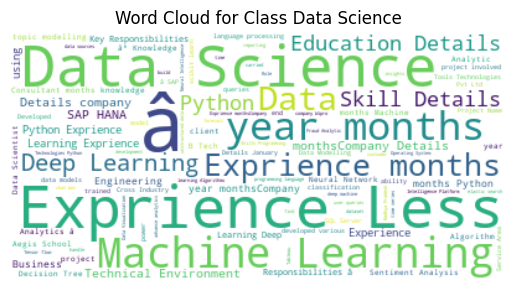

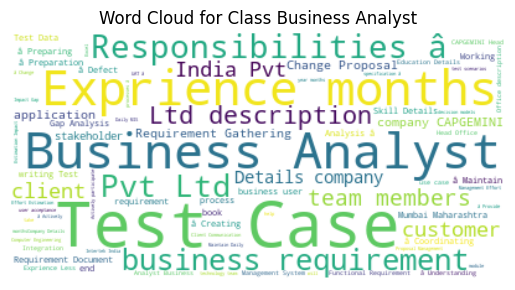

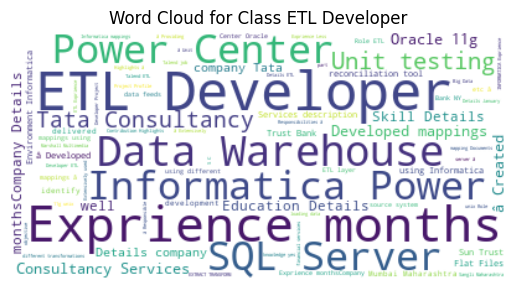

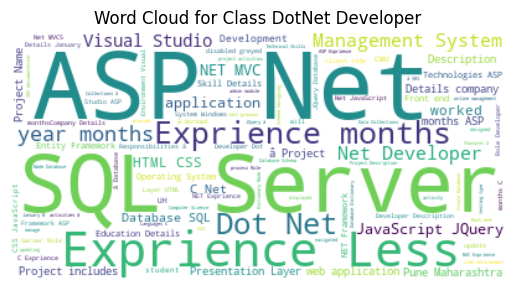

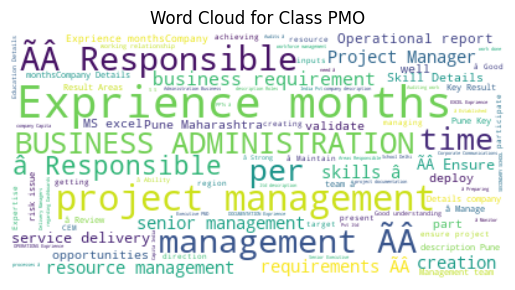

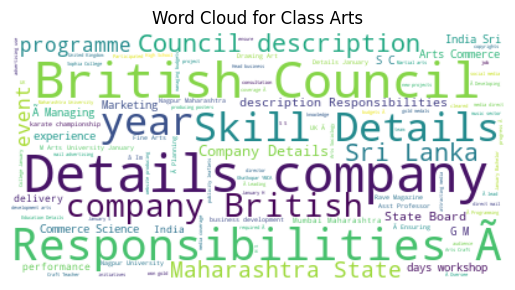

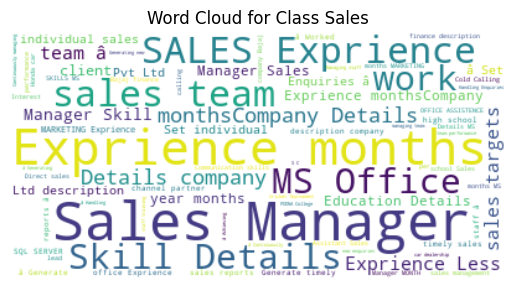

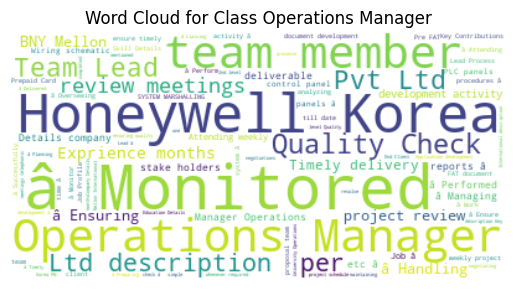

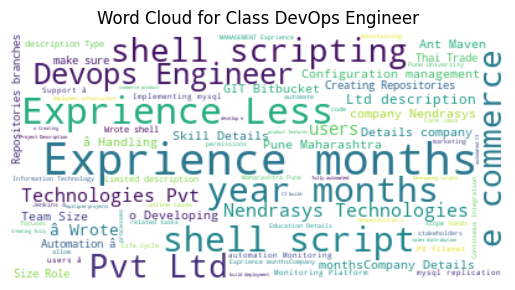

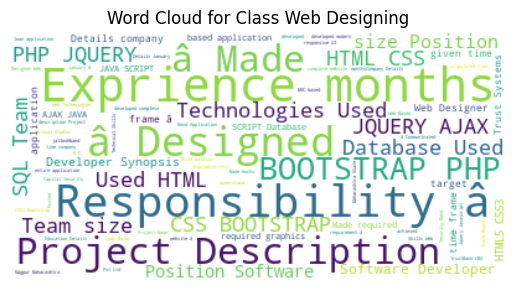

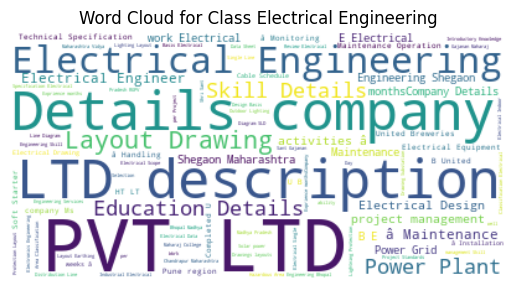

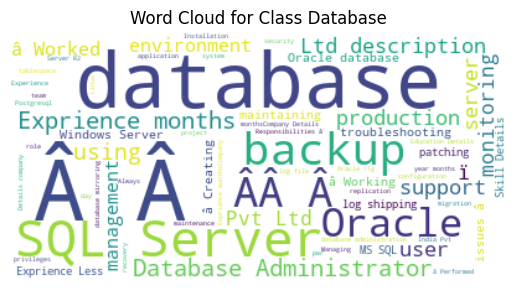

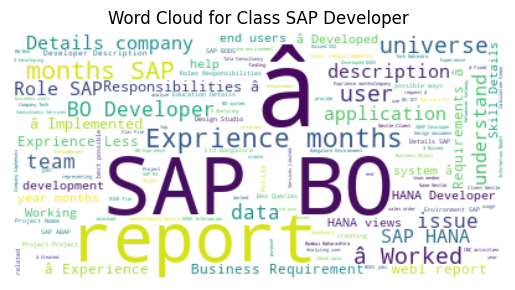

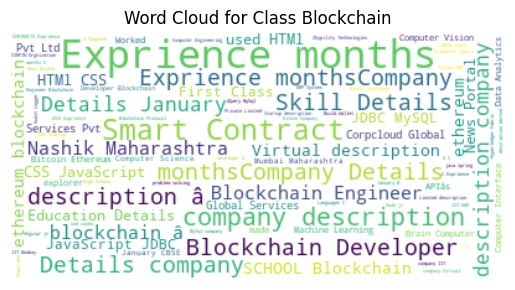

In [3]:
# Generate and display word clouds for each category
# - Word clouds help visualize the most frequently occurring words in each class.
# - Larger words indicate higher frequency in the class-specific text data.
# - Useful for identifying patterns or trends across different categories.
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS)

# Generate and display word clouds for each category
for cat in data['Category'].unique():
    
    # Combine all cleaned text from the current category
    text = ' '.join(data[data['Category'] == cat]['cleaned_resume'])

    # Generate the word cloud
    wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
        
    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {cat}')
    plt.show()


## 🔢 Text Vectorization using TF-IDF  
To convert text into a numerical format suitable for machine learning models, we use **TF-IDF (Term Frequency-Inverse Document Frequency)**:
- **TF (Term Frequency):** Measures how often a word appears in a document.
- **IDF (Inverse Document Frequency):** Reduces the importance of common words by considering their occurrence across all documents.

This helps in emphasizing relevant words while reducing the weight of frequently occurring but unimportant words.


In [4]:
# Transform the text data into numerical features using TF-IDF
# - TF-IDF (Term Frequency-Inverse Document Frequency) assigns importance to words
#   based on how frequently they appear in a document and across all documents.
# - This helps in weighting relevant words higher and less important words lower.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, ngram_range = (1,2), min_df = 2, max_df = 0.9)

X = vectorizer.fit_transform(data['cleaned_resume'])
y = data['Category']

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (962, 1000)


## 🔠 Category Encoding  
Converts text categories (e.g., "Data Science", "Engineering") into numerical labels for modelin

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categories into numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

# Display mapping of categories to numbers
cat_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", cat_mapping)

Category Mapping: {'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


## ✂️ Splitting Data
We split the dataset into training and test sets:
- **80% for training** (used to train the model).
- **20% for testing** (used to evaluate performance).



In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 🤖 Logistic Regression Model  
We train a Logistic Regression model, a widely used algorithm for classification tasks.

### **Steps:**
1. Train the model on the TF-IDF features.
2. Predict the categories on the test set.
3. Evaluate performance using:
   - Accuracy
   - Classification Report
   - Confusion Matrix
   - Cross-Validation


Training Accuracy:  99.22%
Test Accuracy:  96.37%
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.79      1.00      0.88        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         6
           6       0.71      1.00      0.83         5
           7       1.00      1.00      1.00         8
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        15
       

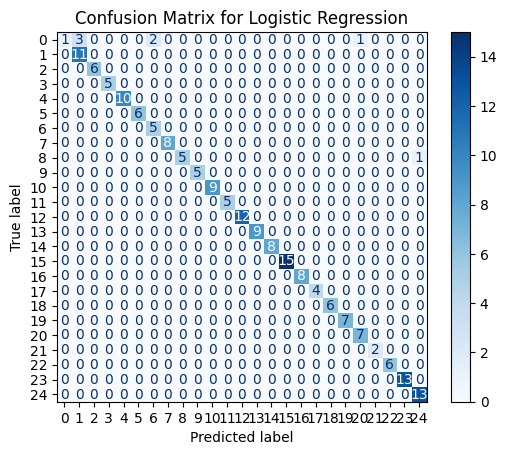

In [7]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize & Train the Logistic Regression model
logisticRegressionModel = LogisticRegression(max_iter = 100, random_state = 42)
logisticRegressionModel.fit(X_train, y_train)

# Predict on the test set
y_predLR = logisticRegressionModel.predict(X_test)

# Evaluate accuracy
logisticRegressionTrainAccuracy = logisticRegressionModel.score(X_train, y_train)
logisticRegressionTestAccuracy = accuracy_score(y_test, y_predLR)
print(f'Training Accuracy: {logisticRegressionTrainAccuracy * 100 : 0.2f}%')
print(f'Test Accuracy: {logisticRegressionTestAccuracy * 100 : 0.2f}%')

# Print a classification report
print('Classification_report:\n', classification_report(y_test, y_predLR))

# Plot the confusion matrix
conf_matrixLR = confusion_matrix(y_test, y_predLR)
dis = ConfusionMatrixDisplay(confusion_matrix = conf_matrixLR, display_labels = logisticRegressionModel.classes_)
dis.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logisticRegressionModel, X, y, cv = 5, scoring = 'accuracy')

# Display cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean() * 100 : .2f}%')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std() * 100 : .2f}%')


Cross-Validation Scores: [0.98445596 0.98445596 0.98958333 1.         0.97395833]
Mean CV Accuracy:  98.65%
Standard Deviation of CV Accuracy:  0.85%


### 📊 Model Evaluation  

- **Training Accuracy:** 99.22%  
- **Test Accuracy:** 96.37%  
- **Cross-Validation Accuracy:** 98.65% ± 0.85%  

### 🔍 Key Class Insights  
- **Perfect Classes (25/25):** Classes 2-19, 21-24 show 100% precision/recall.  
- **Class 0:** High precision (1.00) but low recall (0.14) → Rarely predicted.  
- **Class 1 & 6:** Slightly lower precision (~0.79-0.78) but perfect recall → Occasional false positives.  

### 🧐 Key Takeaways  
- Exceptional overall performance.  
- Cross-validation confirms consistency.    

----
## 🌲 Random Forest Model  
Now, we train a Random Forest Classifier, an ensemble learning method that combines multiple decision trees for better performance and robustness.  

### **Steps:**  
1. Train the model on the TF-IDF features.  
2. Predict the labels on the test set.  
3. Evaluate performance using:  
   - Accuracy
   - Classification Report
   - Confusion Matrix
   - Cross-Validation


Training Accuracy:  100.00%
Testing Accuracy:  100.00%
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        15
  

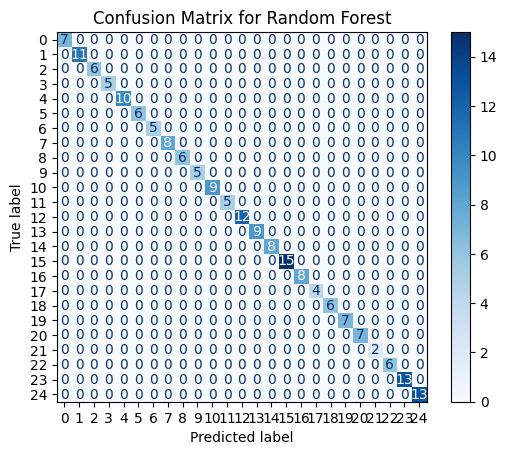

In [9]:
# Train a Random Forest model 
from sklearn.ensemble import RandomForestClassifier

# Initialize & Train the Random Forest model
randomForestModel = RandomForestClassifier(n_estimators = 100, random_state = 42)
randomForestModel.fit(X_train, y_train)

# predict on the test set
y_predRF = randomForestModel.predict(X_test)

# Evaluate accuracy
randomForestTrainAccuracy = randomForestModel.score(X_train, y_train)
randomForestTestAccuracy = accuracy_score(y_test, y_predRF)
print(f'Training Accuracy: {randomForestTrainAccuracy * 100 : .2f}%')
print(f'Testing Accuracy: {randomForestTestAccuracy * 100 : .2f}%')

# Print a classification report
print('Classification report:\n', classification_report(y_test, y_predRF))

# Plot the confusion matrix
conf_matrixRF = confusion_matrix(y_test, y_predRF)
dis = ConfusionMatrixDisplay(confusion_matrix = conf_matrixRF, display_labels = randomForestModel.classes_)
dis.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [10]:
# Perform cross-validation
cv_scores = cross_val_score(randomForestModel, X, y, cv = 5, scoring = 'accuracy')

# Display cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean() * 100 : .2f}%')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std() * 100 : .2f}%')

Cross-Validation Scores: [0.98445596 1.         0.98958333 1.         1.        ]
Mean CV Accuracy:  99.48%
Standard Deviation of CV Accuracy:  0.66%


### 📊 Model Evaluation  

- **Training Accuracy:** 100.00%  
- **Testing Accuracy:** 100.00%  
- **Cross-Validation Accuracy:** 99.48% ± 0.66%  

### 🔍 Performance Insights  
- **All Classes:** Perfect precision, recall, and F1-score (1.00) across all 25 categories.  
- **Consistency:** Near-perfect cross-validation scores.  

### 🧐 Key Takeaways  
- Flawless classification performance on both training and test sets.  
- Minimal variance in cross-validation confirms robustness.  
- Model is production-ready for this dataset - no further tuning needed.  

---
## 🏆 Support Vector Classifier (SVC)  
In this step, we train an SVC (Support Vector Classifier) with a linear kernel. SVC is a powerful algorithm for classification, especially when data is well-separated.

### **Steps:**  
1. Train the model on the TF-IDF features.  
2. Predict the labels on the test set.  
3. Evaluate performance using:  
   - Accuracy
   - Classification Report  
   - Confusion Matrix
   - Cross-Validation 


Training Accuracy:  99.87%
Testing Accuracy:  98.96%
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         6
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         8
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        15
    

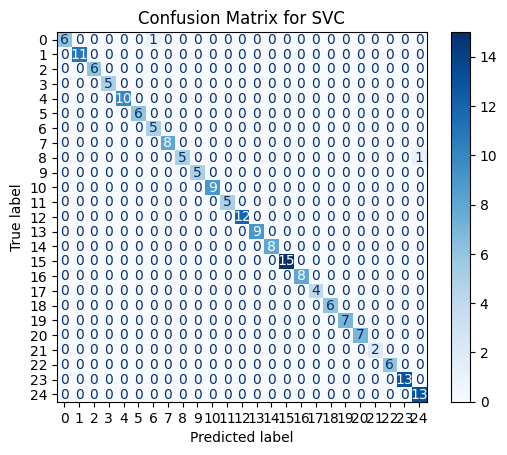

In [11]:
# Train a SVC model
from sklearn.svm import SVC

# Initialize & Train the SVC model
SVCModel = SVC(kernel = 'linear', probability = True, random_state = 42)
SVCModel.fit(X_train, y_train)

# Predict on the test set
y_predSVC = SVCModel.predict(X_test)

# Evaluate accuracy
SVCTrainAccuracy = SVCModel.score(X_train, y_train)
SVCTestAccuracy = accuracy_score(y_test, y_predSVC)
print(f'Training Accuracy: {SVCTrainAccuracy * 100 : .2f}%')
print(f'Testing Accuracy: {SVCTestAccuracy * 100 : .2f}%')

# Prite a classification report
print('Classification report:\n', classification_report(y_test, y_predSVC))

# Plot the confusion matrix
conf_matrixSVC = confusion_matrix(y_test, y_predSVC)
dis = ConfusionMatrixDisplay(confusion_matrix = conf_matrixSVC, display_labels = SVCModel.classes_)
dis.plot(cmap = 'Blues')
plt.title('Confusion Matrix for SVC')
plt.show()

In [12]:
# Perform cross validation
cv_scores = cross_val_score(SVCModel, X, y, cv = 5, scoring = 'accuracy')

# Display cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean() * 100 : .2f}%')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std() * 100 : .2f}%')

Cross-Validation Scores: [0.99481865 0.98963731 0.98958333 1.         0.99479167]
Mean CV Accuracy:  99.38%
Standard Deviation of CV Accuracy:  0.39%


### 📊 Model Evaluation  

- **Training Accuracy:** 99.87%  
- **Testing Accuracy:** 98.96%  
- **Cross-Validation Accuracy:** 99.38% ± 0.39%  

### 🔍 Performance Insights    
- **Class 0:** Slightly lower recall (0.86) → Misses 14% of cases  
- **Class 6:** Lower precision (0.83) → Some false positives  

### 🧐 Key Takeaways  
- Exceptional overall performance.
- Minimal variance in cross-validation confirms model stability  
- Model is production-ready for most use cases  

---
## 🔍 Model Evaluation & Comparison  

Now that we’ve trained multiple models, let's systematically evaluate their performance.  

### **Key Steps:**  
✅ Train each model and measure the training time.  
✅ Compute accuracy, precision, recall, and F1-score.  
✅ Use 5-fold cross-validation to ensure robustness.  
✅ Compute the ROC-AUC score to assess classification performance.  
✅ Compare models visually using a bar chart. 


                 Model    Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression   96.373057   0.971040  0.963731  0.953902   
1        Random Forest  100.000000   1.000000  1.000000  1.000000   
2                  SVC   98.963731   0.990871  0.989637  0.989534   

   Training Time (s)  CV Accuracy (5-fold)   ROC-AUC  
0           0.339001             97.920380  0.999109  
1           0.687998             99.089211  1.000000  
2           1.482993             98.961039  1.000000  


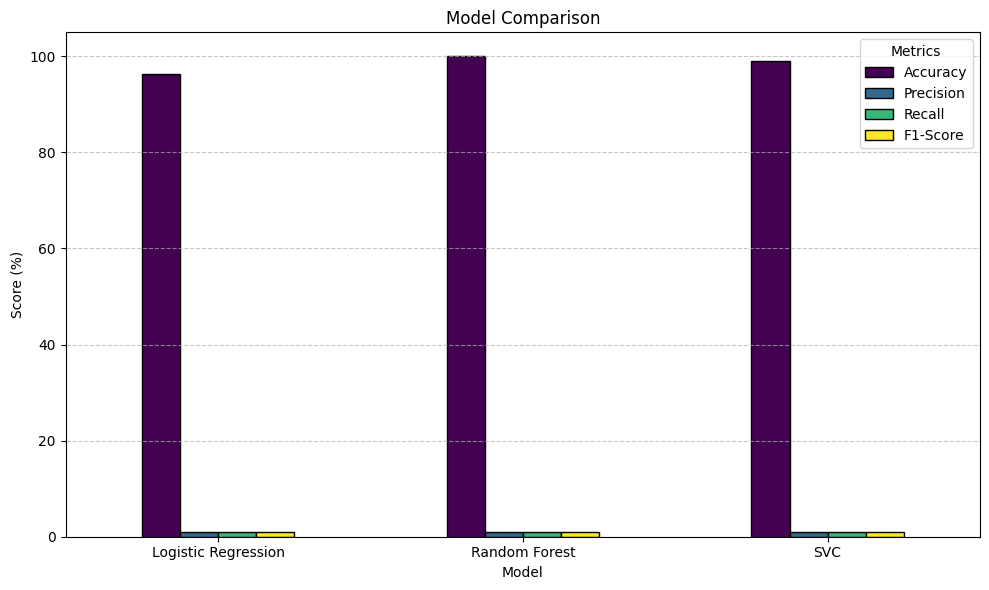

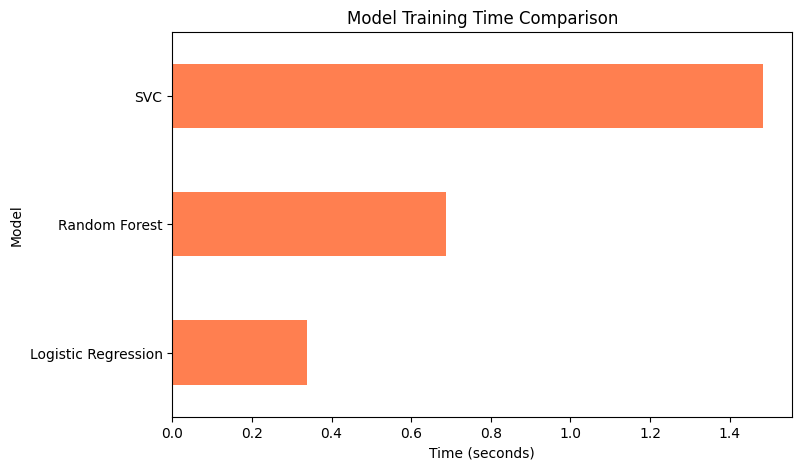

In [13]:
import time
from sklearn.metrics import roc_auc_score

# Function to train a model and record its performance
def evaluateModel(model, modelName, X_train, y_train, X_test, y_test):
    
    # Start timer
    startTime = time.time()
    # Train model
    model.fit(X_train, y_train)
    totalTime = time.time() - startTime

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
    cv_mean = cv_scores.mean() * 100

    # Calculate performance
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred, output_dict = True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class = "ovr")

    return {"Model": modelName, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1_score, "Training Time (s)": totalTime, "CV Accuracy (5-fold)": cv_mean, "ROC-AUC": roc_auc}


# Evaluate Logistic Regression
logisticModelResults = evaluateModel(LogisticRegression(max_iter = 100, random_state = 42), "Logistic Regression", X_train, y_train, X_test, y_test)

# Evaluate Random Forest
randomForestModelResults = evaluateModel(RandomForestClassifier(n_estimators = 100, random_state = 42), "Random Forest", X_train, y_train, X_test, y_test)

# Evaluate SVC
SVCModelResults = evaluateModel(SVC(kernel = 'linear', probability = True, random_state = 42), "SVC", X_train, y_train, X_test, y_test)

# Organize results into a DataFrame
results = pd.DataFrame([logisticModelResults, randomForestModelResults, SVCModelResults])
print(results)

# Visualization - Bar chart comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
results.set_index("Model")[metrics].plot(kind = "bar", figsize = (10, 6), colormap = "viridis", edgecolor = "black")
plt.title("Model Comparison")
plt.ylabel("Score (%)")
plt.xticks(rotation = 0)
plt.legend(title = "Metrics")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

# Plot the training time
results.set_index("Model")["Training Time (s)"].plot(kind="barh", figsize=(8, 5), color="coral")
plt.title("Model Training Time Comparison")
plt.xlabel("Time (seconds)")
plt.ylabel("Model")
plt.show()

## 📊 Model Performance Summary  

| Model                | Accuracy | Precision | Recall | F1-Score | Training Time (s) | CV Accuracy (5-fold) | ROC-AUC  |
|----------------------|----------|-----------|--------|----------|-------------------|----------------------|----------|
| Logistic Regression  | 96.37%   | 0.971     | 0.963  | 0.953    | 0.33s             | 97.92%              | 0.9999   |
| Random Forest        | 100.00%  | 1.000     | 1.000  | 1.000    | 0.68s             | 99.08%              | 1.0000   |
| SVC                 | 98.96%   | 0.990     | 0.989  | 0.989    | 1.48s             | 98.96%              | 1.0000   |

### 🚀 **Key Takeaways**  
- **Random Forest** achieved perfect 100% accuracy with fastest training among top performers  
- **SVC** delivered near-perfect results with reasonable training time  
- **Logistic Regression** showed solid performance with fastest training speed  

🔎 **Final Verdict:** Random Forest is the clear winner for this dataset, offering perfect accuracy with sub-second training time. SVC remains a strong alternative for slightly better generalization (higher CV score).  

----
## 🔹 Phase 2: Resume Analysis


### 📑 Resume Section Slicer  
Converts raw text into structured sections (Education, Skills, etc.) using regex.

In [14]:
import re

# Define grouped section keywords
SECTION_GROUPS = {
    "education": ["education details", "education", "academic background"],
    "skills": ["skills", "skill details", "technical skills"],
    "company": ["company details", "company", "work experience", "employment history"],
    "projects": ["projects", "project details"],
}

def slice_resume_sections(cleaned_resume):
    """
    Slices the resume into structured sections using grouped keywords.

    Args:
        cleaned_resume (str): The cleaned resume text.

    Returns:
        dict: A dictionary containing structured sections of the resume.
    """
    
    # Step 1: Preprocess text
    for section_name, keywords in SECTION_GROUPS.items():
        
        for keyword in keywords:    
            # Ensure section headers start on a new line, even if stuck to previous words
            pattern = rf"(\S)({keyword})" 
            cleaned_resume = re.sub(pattern, r"\1\n\2\n", cleaned_resume, flags = re.IGNORECASE)
            
            pattern = rf"(\b{keyword}\b)"  
            cleaned_resume = re.sub(pattern, r"\n\1\n", cleaned_resume, flags = re.IGNORECASE)

    # Initialize section lists
    sections = {key: [] for key in SECTION_GROUPS}  
    sections["others"] = []  
    current_section = "others"  

    # Step 2: Extract sections by scanning each line
    resume_lines = cleaned_resume.splitlines()

    for line in resume_lines:
        line = line.strip()
        if not line:
            continue  

        # Detect and switch to a new section if a header matches
        for section_name, keywords in SECTION_GROUPS.items():
            if any(re.fullmatch(rf"(?i)\b{keyword}\b", line) for keyword in keywords):
                current_section = section_name
                break
        else:
            sections[current_section].append(line)

    # Step 3: Format output and handle empty sections
    return {key: "\n".join(value).strip() if value else "N/A" for key, value in sections.items()}

# Apply function to extract sections from resumes
section_data = data["cleaned_resume"].apply(slice_resume_sections).apply(pd.Series)
data = pd.concat([data, section_data], axis = 1)

In [15]:
# If 'projects' is not 'N/A', append its content to 'company'
data["experience"] = data["company"] + data["projects"]

# Replace cases where 'projects' is 'N/A' to avoid redundant text
data["experience"] = data["company"].str.replace(r"\n\n\[Projects\]\s*N/A", "", regex = True)

# Drop the 'projects' column after merging
data.drop(['projects', 'company'] , axis = 1, inplace = True)

na_counts = (data == "N/A").sum()
print(na_counts)

Category            0
Resume              0
cleaned_resume      0
education           0
skills            136
others            368
experience          0
dtype: int64


## 🎓 Extracting Degrees from Resume Text

### 📌 Purpose  
This function extracts **educational qualifications** from the education section of resumes. It uses regex to identify various degree names (e.g., B.Tech, MBA, PhD) and returns a standardized list of extracted degrees.


### 🛠️ How It Works  
1. **Defines Common Degrees**:  
   - Engineering & Technology (B.Tech, M.Tech, BSc, MSc)  
   - Business & Management (BBA, MBA, PGDM)  
   - Arts & Humanities (BA, MA)  
   - Science & Medical (MBBS, BPharm)  
   - IT & Computer Science (BCA, MCA, MCS, MCSE)  
   - General & Specialized Certifications (Diplomas, PhD, Data Science)
     

2. **Regex Matching**:  
   - Uses multiple regex patterns to detect degrees in text.  
   - Supports abbreviations (e.g., BSc, MSc) and full forms (e.g., Bachelor of Science).  
   - Handles case insensitivity (`re.IGNORECASE`).  

3. **Normalization & Cleaning**:  
   - Converts matches to uppercase for consistency.  
   - Removes extra spaces and punctuation for uniform formatting.  
   - Returns unique degree names in a list.

In [16]:
import re

def extract_degrees(education_text):
    """
    Extracts degrees from the education section of a resume.

    Args:
        education_text (str): The education section text from a resume.

    Returns:
        list: A list of extracted and standardized degrees.
    """

    degree_keywords = [
        # Law-Related Degrees
        r'\b(?:BA\.\s?LLB|B\.A\.\s?LL\.B|LLB|LLM|Bachelor of Laws|Master of Law|Juris Doctor|SJD)\b',
    
        # Engineering and Technology Degrees
        r'\b(?:B\.\s?(?:Tech|E)|Bachelor of (?:Technology|Engineering))\b',
        r'\b(?:M\.\s?(?:Tech|E)|Master of (?:Technology|Engineering))\b',
        r'\b(?:BSc|MSc|Bachelor of Science|Master of Science)\b',
        r'\b(?:BCA|MCA|Bachelor of Computer Applications|Master of Computer Applications)\b',
        r'\b(?:Bachelors Electronics and Telecommunication)\b',
        r'\b(?:Engineering)\b',
        r'\b(?:B\.Sc\. Maths|Bachelor of Science in Mathematics)\b',

        # Business and Management Degrees
        r'\b(?:BBA|MBA|PGDM|Bachelor of Business Administration|Master of Business Administration)\b',
        r'\b(?:BCom|MCom|B\.Com|Bachelor of Commerce|Master of Commerce)\b',
    
        # Arts and Humanities Degrees
        r'\b(?:BA|MA|Bachelor of Arts|Master of Arts)\b',
        r'\b(?:BA in English Literature|Bachelor of English Literature)\b',
    
        # Education and Teaching Degrees
        r'\b(?:BEd|MEd|Bachelor of Education|Master of Education)\b',
        r'\b(?:Asst\.\s?Professor|Assistant Professor)\b',
    
        # Science and Medical Degrees
        r'\b(?:MBBS|BPharm|MPharm|Bachelor of Pharmacy|Master of Pharmacy)\b',
    
        # Computer Science and IT Certifications
        r'\b(?:MCSE|Microsoft Certified Systems Engineer|Web and Graphics Designer|Web Designing and Developer)\b',
        r'\b(?:MCM|Master of Computer Management)\b',
        r'\b(?:B\.Sc\. Computer Science|BSc Computer Science)\b',
        r'\b(?:MCS|Master of Computer Science)\b',
    
        # Secondary and Intermediate Education
        r'\b(?:HSC|SSC|Higher Secondary Certificate|Secondary School Certificate|Intermediate|Entermediate|H\.S\.C\.|High School Diploma)\b',
        r'\b(?:Sadvidya Pre-University College)\b',
    
        # Specialized Fields
        r'\b(?:Data Science|Business Analyst|SAP BO Developer|Hadoop Developer|Fitness Trainer)\b',
    
        # Expanded Patterns for Flexibility
        r'\b(?:B\.Sc|BE|M.F.A|H.S.C|S.S.C|B.F.A|M.C.A|B.A|M\.Sc|Diploma|Diplomas|Bachelors|Bachelor|Master|Masters|PhD|Doctorate)\b',
        r'\b(?:Diploma in [A-Za-z& ]+|Certificate in [A-Za-z& ]+)\b'
    ]

    # Combine patterns and find matches
    degree_pattern = '|'.join(degree_keywords)
    matches = re.findall(degree_pattern, education_text, flags = re.IGNORECASE)

    # Normalize and clean the matches
    normalized_degrees = {match.upper().replace('.', '').strip() for match in matches}

    return list(normalized_degrees)

# Apply function on the education column
data['degrees'] = data['education'].apply(extract_degrees)

## 📅 Extracting Education Years from Resume Text

### 📌 Purpose  
This function extracts **education timelines** from the education section of resumes. It identifies years and date ranges (e.g., 2015-2018, 2020) using regex patterns and returns standardized date entries.

### 🛠️ How It Works  
1. **Defines Date Patterns**:  
   - Year ranges with separators: `2015-2018`, `2015 to 2018`  
   - Single years: `2015`, `2020`  
   - Month-year combinations: `May 2015 - August 2018`  

2. **Regex Matching**:  
   - Handles 4-digit years (1900-2099)   
   - Recognizes multiple range separators (`-`, `to`, `–`)  
   - Case insensitive matching  (`re.IGNORECASE`). 

3. **Normalization & Cleaning**:  
   - Converts all matches to consistent `YYYY-YYYY` or `YYYY` format  
   - Removes duplicate entries  
   - Returns `None` if no years found  


In [17]:
def extract_years(education_text):
    """
    Extracts years from the education section of a resume.

    Args:
        education_text (str): The education section text from a resume.

    Returns:
        list: A list of extracted years.
    """
    
    # Month names to capture patterns with months
    month_names = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)?\s*'

    # Year patterns (including ranges with and without month names)
    year_patterns = [
        rf'({month_names}(19\d{{2}}|20\d{{2}}))\s*(?:to|-|–)\s*({month_names}(19\d{{2}}|20\d{{2}}))', 
        r'\b(19\d{2}|20\d{2})-(19\d{2}|20\d{2})\b',  
        r'\b(19\d{2}|20\d{2})\b'  
    ]

    # Combine patterns and find matches
    year_pattern = '|'.join(year_patterns)
    matches = re.findall(year_pattern, education_text, flags = re.IGNORECASE)

    # Process and normalize matches
    extracted_years = set()

    for match in matches:
        if match[1] and match[3]:  
            extracted_years.add(f'{match[1]}-{match[3]}')
        elif match[4] and match[5]: 
            extracted_years.add(f'{match[4]}-{match[5]}')
        elif match[6]:  
            extracted_years.add(match[6])

    return list(extracted_years) if extracted_years else None

# Apply function on the education column
data['years'] = data['education'].apply(extract_years)

## 🏛️ Extracting Educational Institutions from Resume Text

### 📌 Purpose  
This function identifies **universities, colleges, and institutes** from education sections in resumes. It handles both generic institution types and specific known university names.

### 🛠️ How It Works  
1. **Defines Institution Patterns**:  
   - Generic types: `University`, `College`, `Institute`, `Academy`  
   - Specific institutions: `JNTU`, `Mumbai University`  
   - International variants: `Polytechnic`, `Autonomous Institution`  

2. **Regex Matching**:  
   - Captures institution names appearing.
   - Handles special characters (&,.,-) in names  
   - Case insensitive matching (`re.IGNORECASE`).

3. **Cleaning & Validation**:  
   - Removes leading/trailing whitespace  
   - Deduplicates entries  
   - Returns `None` if no institutions found  


In [18]:
def extract_universities(education_text):
    """
    Extracts university, college, and institute names from education details.

    Args:
        education_text (str): The education section from a resume.

    Returns:
        list: A list of extracted institution names.
    """

    # Expanded list of keywords with additional patterns for better extraction
    uni_keywords = (
        r"(?:University|Institute|College|School|Academy|Technological|Polytechnic|Board|High School|Academy|Campus|Autonomous Institution|"
        r"YMCAUST|RTMNU|ALAMURI|Osmania|Adichunchanagiri|Patil|Bharati Vidyapeeth|Khalsa|JNTU|Maharashtra Board|Braindatawire|"
        r"INFOSYS|BNY Mellon|Guru Nanak|Mumbai university|lovely professional university|Sunbeam academy|Sdnbvc Hr|UIT-RGPV|"
        r"St micheal high|SGBAU Amaravti|Dr\.BAMUAurangabad)"
    )

    # Regex pattern to capture university/institute names
    uni_pattern = (
        rf"(?:B\.E|BBA|LLB|B\.Tech|Bachelors|Entermediate|HSC|SSC|MCA|TYBCOM|Bachelor Of Engineering)\s*(?:[A-Z][a-zA-Z&.,\-\s]*)?"
        rf"{uni_keywords}(?:[A-Za-z&.,\-\s]*)?"  
        r"|(?:[A-Z][a-zA-Z&.,\-\s]*?)?"          
        rf"{uni_keywords}(?:[A-Za-z&.,\-\s]*?)" 
    )

    # Extract matches
    matches = re.findall(uni_pattern, education_text, re.IGNORECASE)

    # Clean and remove duplicates
    extracted_universities = list(set(match.strip() for match in matches if match))

    return extracted_universities if extracted_universities else None

# Apply function on the education column
data['institution'] = data['education'].apply(extract_universities)

## 🛠️ Extracting Skills from Resume Text

### 📌 Purpose  
This function identifies **technical skills and their associated experience** from the skills section of resumes. It handles both standalone skills and those with experience durations.

### 🛠️ How It Works  
1. **Defines Skill Patterns**:  
   - Comprehensive list of 100+ skills including variations.

2. **Regex Matching**:  
   - Captures skills with experience patterns (e.g., "Python Experience 3 years")  
   - Case insensitive matching (`re.IGNORECASE`)   

3. **Cleaning & Validation**:  
   - Normalizes skill capitalization.
   - Deduplicates entries (keeps highest experience when duplicates exist)  
   - Returns `None` if no skills found  


In [19]:
def extract_skills(skills_section):
    """
    Extracts skills and experience from the skills section.

    Args:
        skills_section (str): The skills section from a resume.

    Returns:
        list: A list of dictionaries containing extracted skills and experience.
    """

    # Define skills (with common variations, ensuring multi-word phrases are handled)
    skills_list = [
        "Core Java", "Python", "Python2", "Python3", "AWS", "Machine Learning", "Sklearn", "Scipy", "Keras", "Matlab", "Deep Learning",
        "Data Science", "Data Analysis", "Excel", "SQL", "Database Management", "C", "C Basics", "Data Structure", "Linear Programming",
        "Retail Marketing", "Retail", "SCM", "IOT", "NLP", "R", "SAP HANA", "Tableau", "MS Office", "Algorithms", "Mathematics", "BI",
        "Visualization", "HTML", "CSS", "JavaScript", "jQuery", "DATA SCIENCE", "computer vision", "Hr Management", "Hr Operations",
        "Communication", "DYNAMICS",  "AX", "DBMS", "Oracle", "Data Analysis", "Word", "PowerPoint", "Outlook", "Windows XP", "Windows",
        "Angular", "PHOTOSHOP", "Human resource Finance", "Legal", "Ms-Cit", "Web design", "Php", "AUTO CAD", "CNC", "CAD", "AUTOMOTIVE",
        "Site Engineer", "JAVA", "DATABASES", "Hibernate", "Jsp", "Servlet", "Operations Management", "Network Security", "ACLS", "ASA",
        "CHECKPOINT", "CISCO", "Loadbalncing F5", "security", "VPN", "LAN", "Networking", "Reputation Based Firewall", "Technologies", 
        "DHCP", "MIDDLEWARE", "SHELL SCRIPTS", "RMAN", "informatica", "Blockchain", "DApps", "Stack", "Sharepoint", "Scheduling", "MySQL",
        "LEGAL WRITING", "Data Entry", "Sales", "Cold Calling", "SAP BO", "power point", "ISERIES", "Linux", "unix", "RAC", "ASM", "DATAGUARD",
        "SQOOP", "INTEGRATION", "DATA WAREHOUSE", "NET", "ASP", "AUTOCAD", "DB2", "IIS", "IIS 6", "Cloud Computing", "Solution Architect",
        "Azure", "AWS", "ETL", "NET", "Jira", "Operating Systems", "TESTING", "ANDROID", "Webdriver", "Regression Testing", "CPP", "DESIGN",
        "Marketing", "Satisfaction", "Training", "NOC", "RESOURCE PLANNING", "ERP", "REST API", "DJANGO", "Git", "Documentation", "Management",
        "FORECASTING", 
    ]

    # Create a case-insensitive pattern for skills
    skills_pattern = "|".join(re.escape(skill) for skill in skills_list)

    # Pattern to capture skill with experience
    experience_pattern = re.compile(
        rf"({skills_pattern})[\s-]*Exprience[\s-]*(?:(\d+)\s?(?:year|yr|months?))?", re.IGNORECASE
    )

    # Extract skills and experience
    matches = experience_pattern.findall(skills_section)

    # Normalize and store extracted information
    extracted_skills = {}
    for match in matches:
        skill = match[0].strip().title()
        experience = int(match[1]) if match[1] else 0
        # If duplicate skill is found, keep the max experience
        if skill in extracted_skills:
            extracted_skills[skill] = max(extracted_skills[skill], experience)
        else:
            extracted_skills[skill] = experience

    # Capture standalone skills -without experience
    standalone_skills = re.findall(skills_pattern, skills_section, re.IGNORECASE)

    for skill in standalone_skills:
        skill = skill.strip().title()
        if skill not in extracted_skills:
            extracted_skills[skill] = None

    # Convert to list of dictionaries
    return [{"skill": skill, "experience": (str(exp) if exp else None)} for skill, exp in extracted_skills.items()] if extracted_skills else None


# Apply function on the skills column
data["Skills"] = data["skills"].apply(extract_skills)

## 🏢 Extracting Company Names from Resume Text  

### 📌 Purpose  
This function identifies **employer names** from experience sections in resumes. It handles various company suffixes and ignores false positives.

### 🛠️ How It Works  
1. **Defines Company Patterns**:  
   - Recognizes common corporate suffixes: `LLC`, `Ltd`, `Inc`, etc.  

2. **Regex Matching**:  
   - Captures text between hyphens before "description" markers  
   - Case insensitive matching (`re.IGNORECASE`)  

3. **Cleaning & Validation**:  
   - Removes leading/trailing whitespace  
   - Filters out standalone "description" matches  
   - Returns `None` if no companies found  

In [20]:
def extract_company(text):
    experience_info = []
    
    # Improved pattern to capture company names more precisely
    company_pattern = re.compile(r"-\s*([A-Za-z0-9&.,\s]*?(?:LLC|Ltd|Limited|Inc|Technologies|Consulting|Systems|Pvt\s*Ltd)?)\s*description\s*-", re.IGNORECASE)

    # Split the text by section dividers
    sections = text.split("---------------------------------------------------")

    for section in sections:
        company_matches = company_pattern.findall(section)

        for company in company_matches:
            company = company.strip()

            if company and company.lower() != 'description':  
                experience_info.append({
                    "Company": company,
                })

    return experience_info if experience_info else None

# Apply function on the experience column
data['company'] = data['experience'].apply(extract_company)

## 📄 Resume Readability & Length Analysis  

This code performs **three key operations** on resumes:  

1. Calculate Readability Score using Flesch Reading Ease to measure how easy a resume is to read.  
2. Count Total Words in Resume.
3. Remove Unnecessary Columns after extracting relevant data



In [21]:
import textstat
# Calculate the readability score (Flesch Reading Ease) for each resume  
data["readability_score"] = data["cleaned_resume"].apply(lambda x: textstat.flesch_reading_ease(x))

# Calculate the total word count of each resume
data["resume_length"] = data["cleaned_resume"].apply(lambda x: len(x.split()))

# Drop 'education', 'skills', 'experience', 'others' columns after the extraction
data.drop(['education', 'skills', 'experience', 'others'] , axis = 1, inplace = True)

In [22]:
print(data.isnull().sum())
# Handle missing values
data['years'] = data['years'].fillna(0)
data['Skills'].fillna('Unknown', inplace = True)
data['institution'].fillna('Unknown', inplace = True)
data['company'].fillna('Unknown', inplace = True)

data.head()

Category               0
Resume                 0
cleaned_resume         0
degrees                0
years                301
institution           49
Skills               141
company               32
readability_score      0
resume_length          0
dtype: int64


C:\Users\acc\AppData\Local\Temp\ipykernel_21308\2237612893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Skills'].fillna('Unknown', inplace = True)
C:\Users\acc\AppData\Local\Temp\ipykernel_21308\2237612893.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Category                                             Resume  \
344      Java Developer  TECHNICAL SKILLS Programming Languages: Java (...   
381      Java Developer  TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...   
351      Java Developer  Education Details \r\nJanuary 2013 Master of E...   
778              Hadoop  Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...   
277  Health and fitness  Education Details \r\nJanuary 1992 to January ...   

                                        cleaned_resume  \
344  TECHNICAL SKILLS Programming Languages Java Se...   
381  TECHNICALSKILLS SpringMVC Hibernate JDBC Java ...   
351  Education Details January 2013 Master of Engin...   
778  Skill Set Hadoop Map Reduce HDFS Hive Sqoop ja...   
277  Education Details January 1992 to January 2003...   

                                               degrees  \
344                                    [HSC, SSC, MCA]   
381                         [DIPLOMA, ENGINEERING, BE]   
351  [BACHELOR OF ENGINEERING, SSC, MASTER OF ENGIN...   
778                                 [HADOOP DEVELOPER]   
277                                  [FITNESS TRAINER]   

                        years  \
344  [2018, 2015, 2010, 2012]   
381    [2013-2016, 2009-2013]   
351  [2001, 2013, 1999, 2005]   
778                         0   
277               [1992-2003]   

                                           institution  \
344  [H.S.C Amravati Maharashtra Amravati Universit...   
381  [Diploma Computer technology Nashik Maharashtr...   
351  [Bachelor of Engineering Information Technolog...   
778  [Details\nHadoop Developer Hadoop Developer - ...   
277  [First year Science Mumbai Maharashtra St mich...   

                                                Skills  \
344  [{'skill': 'Css', 'experience': None}, {'skill...   
381  [{'skill': 'Ax', 'experience': '12'}, {'skill'...   
351                                            Unknown   
778  [{'skill': 'Sqoop', 'experience': '49'}, {'ski...   
277                                            Unknown   

                                               company  readability_score  \
344  [{'Company': 'Salcluster technologies'}, {'Com...              49.82   
381  [{'Company': 'Replete business solutions pvt l...              11.55   
351  [{'Company': 'Maxgen Technologies'}, {'Company...              14.05   
778                     [{'Company': 'Braindatawire'}]              20.35   
277  [{'Company': 'Golds gym fitness solutionflora ...              -7.37   

     resume_length  
344            575  
381            166  
351            213  
778            244  
277             74

## 🎓 Degree Ranking & Scoring  

This code assigns **numerical scores** to academic degrees based on their level. The goal is to quantify the importance of educational qualifications for resume analysis.  

### 🔹 How It Works:  

1. **Degree Ranking Dictionary:**   
   - Assigns weights to degrees (e.g., PhD = 10, Bachelor's = 7, Diploma = 6).  
   - Higher scores indicate higher educational qualifications.  

2. **Degree Scoring Function:**  
   - Converts extracted degrees to uppercase, removes punctuation, and checks their ranking.  
   - Computes a total score based on all degrees in a resume.  

3. **Apply Scoring to DataFrame:**   
   - The function is applied to the `degrees` column, creating a new `degree_score` column.  



In [23]:
degree_rankings  = {
    # Doctorate level
    'PHD': 10, 'DOCTORATE': 10, 'SJD': 10,
    # Professional doctorates
    'JD': 9, 'MD': 9, 'MBBS': 9,
    # Master's level
    'LLM': 8, 'MASTER OF LAW': 8, 'MSC': 8, 'MASTER OF SCIENCE': 8, 'MTECH': 8, 'MASTER OF TECHNOLOGY': 8, 'ME': 8, 'MASTER OF ENGINEERING': 8,
    'MBA': 8, 'MASTER OF BUSINESS ADMINISTRATION': 8, 'MCOM': 8, 'MASTER OF COMMERCE': 8,'MA': 8, 'MASTER OF ARTS': 8, 'MED': 8,
    'MASTER OF EDUCATION': 8, 'MPHARM': 8, 'MASTER OF PHARMACY': 8, 'MCM': 8, 'MASTER OF COMPUTER MANAGEMENT': 8, 'MCS': 8, 
    'MASTER OF COMPUTER SCIENCE': 8, 'MCA': 8, 'MASTER OF COMPUTER APPLICATIONS': 8, 'MASTER': 8, 'MASTERS': 8, 
    # Bachelor's level
    'LLB': 7, 'BACHELOR OF LAWS': 7, 'BA LLB': 7, 'BSC': 7, 'BACHELOR OF SCIENCE': 7, 'BTECH': 7, 'BACHELOR OF TECHNOLOGY': 7, 'BE': 7,
    'BACHELOR OF ENGINEERING': 7, 'BBA': 7, 'BACHELOR OF BUSINESS ADMINISTRATION': 7, 'BCOM': 7, 'BACHELOR OF COMMERCE': 7, 'BA': 7,
    'BACHELOR OF ARTS': 7, 'BED': 7, 'BACHELOR OF EDUCATION': 7, 'BPHARM': 7, 'BACHELOR OF PHARMACY': 7, 'BCA': 7,
    'BACHELOR OF COMPUTER APPLICATIONS': 7, 'BACHELOR': 7, 'BACHELORS': 7,
    # Diploma/Certificate level
    'DIPLOMA': 6, 'DIPLOMAS': 6, 'DIPLOMA IN': 6, 'CERTIFICATE IN': 6, 'MCSE': 6, 'MICROSOFT CERTIFIED SYSTEMS ENGINEER': 6,
    # Associate/Intermediate level
    'INTERMEDIATE': 5, 'HSC': 5, 'HIGHER SECONDARY CERTIFICATE': 5, 'HSSC': 5,
    # Secondary level
    'SSC': 4, 'SECONDARY SCHOOL CERTIFICATE': 4, 'HIGH SCHOOL DIPLOMA': 4,
    # Special cases 
    'ASSISTANT PROFESSOR': 8, 'ASST PROFESSOR': 8, 'WEB AND GRAPHICS DESIGNER': 5, 'WEB DESIGNING AND DEVELOPER': 5, 'DATA SCIENCE': 6, 
    'BUSINESS ANALYST': 6, 'SAP BO DEVELOPER': 6, 'HADOOP DEVELOPER': 6, 'FITNESS TRAINER': 4
}

def degree_values(degrees_list, degree_rankings):
    """
    Calculates a weighted score for a list of academic degrees based on predefined rankings.
    
    Args:
        degrees_list: List of degree strings to evaluate 
        degree_rankings: Dictionary mapping degree names to numerical weights
    
    Returns:
        int: Sum of weights for all recognized degrees in the input list.
    """
    total_score = 0
    
    for degree in degrees_list:
        normalized_degree = degree.upper().replace('.', '').strip()
        total_score += degree_rankings.get(normalized_degree, 0) 
    
    return total_score

# Apply function on the degrees column
data['degree_score'] = data['degrees'].apply(lambda x: degree_values(x, degree_rankings))

## 🛠️ Skill Processing & Experience Scoring  

This code processes **skills and experience data** from resumes to create meaningful metrics for analysis.  

### 🔹 How It Works:  

1. **Skill Processing Function:**   
   - Cleans and standardizes skill data.  
   - Extracts years of experience per skill.  
   - Caps experience at **20** years per skill to prevent anomalies.  

2. **Key Metrics Computed:**   
   - `skill_count`: Number of valid skills.  
   - `total_experience`: Sum of experience across all skills.  
   - `weighted_skill_score`: Experience-weighted sum (scaled by 0.2).  

3. **Apply Function & Handle Missing Data:**  
   - Converts extracted skills into structured numeric features.  
   - Uses median imputation to handle missing values.  



In [24]:
def process_skills(skills_list, max_years_per_skill = 20):
    """
    Processes a list of skills with experience into validated metrics.
    
    Args:
        skills_list: List of skill dictionaries 
        max_years_per_skill: Cap for experience per skill
        
    Returns:
        Dictionary with:
        - skill_count: Number of valid skills
        - total_experience: Sum of experience
        - weighted_skill_score: Experience-weighted sum
    """
    # Initialize with None (distinguishes missing from true 0)
    if not skills_list or skills_list == 'Unknown':
        return {
            'skill_count': None,
            'total_experience': None,
            'weighted_skill_score': None
        }
    
    skill_count = 0
    total_experience = 0
    weighted_score = 0
    
    for skill_dict in skills_list:
        if isinstance(skill_dict, dict):
            skill = skill_dict.get('skill', '').strip().lower()
            exp = skill_dict.get('experience')
            
            if skill: 
                skill_count += 1
                
                # Safely convert experience to float
                try:
                    exp_years = float(exp) if exp and str(exp).replace('.', '').isdigit() else 0
                except (ValueError, AttributeError):
                    exp_years = 0
                
                # Apply cap per skill and sum
                exp_years = min(exp_years, max_years_per_skill)
                total_experience += exp_years
                weighted_score += exp_years * 0.2 
    
    
    return {
        'skill_count': skill_count if skill_count > 0 else None,
        'total_experience': total_experience if total_experience > 0 else None,
        'weighted_skill_score': weighted_score if weighted_score > 0 else None
    }

# Apply function on the Skills column
skills_data = data['Skills'].apply(lambda x: process_skills(x, max_years_per_skill = 20)).apply(pd.Series)

# Median imputation
for col in ['skill_count', 'total_experience', 'weighted_skill_score']:
    median_val = skills_data[col].median()
    skills_data[col] = skills_data[col].fillna(median_val)


# Merge with main data
data = pd.concat([data, skills_data], axis = 1)

## 🏢 Company Name Processing & Resume Evaluation  

This code processes **company names** from work experience entries to extract useful insights for resume evaluation.  

### 🔹 How It Works:  

1. **Company Processing Function:**   
   - Standardizes company names by removing unnecessary suffixes. 
   - Extracts unique company names in title case for consistency.  

2. **Key Metrics Computed:**  
   - `company_count`: Number of unique companies the candidate has worked for.  
   - `company_names_cleaned`: Up to 3 distinct company names, cleaned and formatted.  

3. **Apply Function & Data Merging** 
   - Cleans and structures company-related data.  
   - Merges processed results back into the dataset.  

In [25]:
def process_companies(companies_list):
    """
    Processes a list of company names from work experience entries, standardizing names
    and extracting key metrics for resume evaluation.

    Args:
        companies_list: List of company entries.

    Returns:
        dict: A dictionary containing:
              - company_count (int): Number of unique companies.
              - company_names_cleaned (list): Up to 3 standardized company names in title case .
    """
    if not companies_list or companies_list == 'Unknown':
        return {
            'company_count': 0,
            'company_names_cleaned': []
        }
    
    unique_companies = set()
    top_company_flag = 0
    
    for entry in companies_list:
        if isinstance(entry, dict):
            company = entry.get('Company', '')
            if company:
                # Standardize name (remove LLP/pvt.ltd/etc.)
                cleaned = re.sub(r'(LLP|pvt\.ltd|technologies|\.)', '', company, flags = re.IGNORECASE).strip()
                unique_companies.add(cleaned.title())  
    
    return {
        'company_count': len(unique_companies) if len(unique_companies) > 0 else None,
        'company_names_cleaned': list(unique_companies)[:3] 
    }

# Apply function on the company column
company_data = data['company'].apply(process_companies).apply(pd.Series)

# Merge with main data
data = pd.concat([data, company_data], axis = 1)

## 🎓 Educational Institution Processing & Degree Extraction  

This code processes **educational institution names** to extract key insights for resume evaluation.  

### 🔹 How It Works:  

1. **Institution Processing Function:**  
   - Extracts degree abbreviations (e.g., `B.C.A`, `M.S.`, `Ph.D.`) from text.  
   - Counts the total number of educational institutions listed.  

2. **Key Metrics Computed:**   
   - `institution_count`: Total number of institution entries.  
   - `institution_degrees`: Up to 3 extracted degree abbreviations (if available).  

3. **Apply Function & Data Merging:** 
   - Cleans and structures education-related data.  
   - Merges processed results back into the dataset.  


In [26]:
def process_institutions(institutions_list):
    """
    Processes a list of educational institutions to extract degree abbreviations and count institutions.

    Args:
        institutions_list: List of institution entries.

    Returns:
        dict: A dictionary containing:
              - institution_count (int): Total number of institution entries
              - institution_degrees (list): Up to 3 extracted degree abbreviations 
    """
    
    if not institutions_list or institutions_list == 'Unknown':
        return {
            'institution_count': 0,
            'institution_degrees': []
        }
    
    degrees = set()
    top_institution_flag = 0
    
    for entry in institutions_list:
        if isinstance(entry, str):
            # Extract degree abbreviation (e.g., "B.C.A" from text)
            degree_match = re.search(r'\b([A-Z]\.?[A-Z]\.?[A-Z]?)\b', entry)
            if degree_match:
                degrees.add(degree_match.group(1))
    
    return {
        'institution_count': len(institutions_list),
        'institution_degrees': list(degrees)[:3]  
    }

# Apply function on the institution column
institution_data = data['institution'].apply(process_institutions).apply(pd.Series)

# Merge with main data
data = pd.concat([data, institution_data], axis = 1)

In [27]:
# Remove raw text/processed columns now that features are extracted
data.drop(['Resume', 'degrees', 'institution', 'Skills', 'company'] , axis = 1, inplace = True)

data.head()

Category                                     cleaned_resume  \
344      Java Developer  TECHNICAL SKILLS Programming Languages Java Se...   
381      Java Developer  TECHNICALSKILLS SpringMVC Hibernate JDBC Java ...   
351      Java Developer  Education Details January 2013 Master of Engin...   
778              Hadoop  Skill Set Hadoop Map Reduce HDFS Hive Sqoop ja...   
277  Health and fitness  Education Details January 1992 to January 2003...   

                        years  readability_score  resume_length  degree_score  \
344  [2018, 2015, 2010, 2012]              49.82            575            17   
381    [2013-2016, 2009-2013]              11.55            166            13   
351  [2001, 2013, 1999, 2005]              14.05            213            19   
778                         0              20.35            244             6   
277               [1992-2003]              -7.37             74             4   

     skill_count  total_experience  weighted_skill_score  company_count  \
344         15.0              26.0                   5.2              2   
381         19.0              64.0                  12.8              1   
351          7.0              26.0                   5.2              2   
778         10.0              20.0                   4.0              1   
277          7.0              26.0                   5.2              1   

                                 company_names_cleaned  institution_count  \
344                            [Omegasoft, Salcluster]                  4   
381               [Replete Business Solutions Pvt Ltd]                  1   
351  [Mis Generation Of Tata Sky And Tata Power, Ma...                  3   
778                                    [Braindatawire]                  1   
277            [Golds Gym Fitness Solutionflora Hotel]                  1   

       institution_degrees  
344  [S.S.C, H.S.C, M.C.A]  
381                     []  
351                [S.S.C]  
778                     []  
277                     []

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize Numerical Features
scaler = MinMaxScaler()
num_columns = ['readability_score', 'resume_length', 'degree_score', 'skill_count', 'total_experience', 'weighted_skill_score',
                'company_count', 'institution_count']

data[num_columns] = scaler.fit_transform(data[num_columns])

# Convert Categorical Features
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

## 📊 Resume Scoring & Candidate Tiering  

### 🔹 Steps:  
1. **Calculate Final Score:**  Weighted sum of key resume metrics.  

2. **Normalize Score** Scales values between **0-100**.  

3. **Assign Candidate Tiers**  Categorizes candidates into **A, B, or C** tiers.  

4. **Visualize Score Distribution**  Histogram with tier thresholds.  


In [29]:
# STEP 1: Calculate Key Metrics 
data['final_score'] = (
    0.15 * data['degree_score'] +          
    0.35 * data['weighted_skill_score'] +    
    0.35 * data['total_experience'] +  
    0.15 * data['company_count'] +          
    0.15 * data['readability_score'] +      
    0.05 * data['resume_length']                 
)

# STEP 2: Normalize to 0-100 scale
data['final_score'] = (data['final_score'] - data['final_score'].min()) / (data['final_score'].max() - data['final_score'].min()) * 100

# STEP 3: Add tier labels for HR filtering
data['tier'] = pd.cut(data['final_score'], bins = [0, 40, 70, 100], labels = ['C (Review Later)', 'B (Potential)', 'A (Top Candidate)'])

data[['Category', 'final_score', 'tier']].head()

Category  final_score              tier
344        15    36.055724  C (Review Later)
381        15    57.565057     B (Potential)
351        15    31.757431  C (Review Later)
778        13    20.379580  C (Review Later)
277        14    20.257975  C (Review Later)

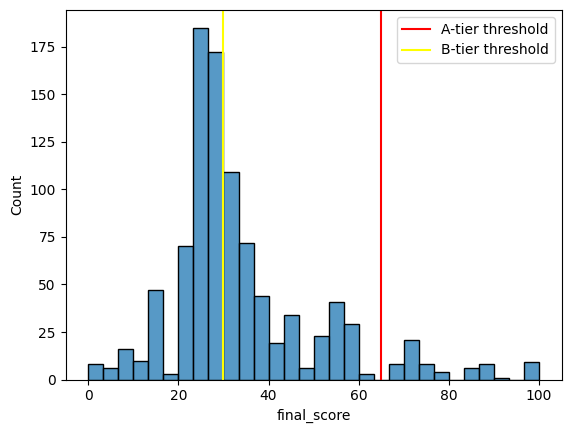

In [30]:
# Plot score distribution with tier thresholds
import seaborn as sns
sns.histplot(data['final_score'], bins = 30)
plt.axvline(x = 65, color = 'red', label = 'A-tier threshold')
plt.axvline(x = 30, color = 'yellow', label = 'B-tier threshold')
plt.legend()

## 🚀 Model-Based Resume Scoring (Using Random Forest)  

1. **Encode Categorical Labels:**  
 - We convert resume tier labels (A,B,C) into numerical values using `LabelEncoder`.  

2. **Define Features and Target:**  
 - **Features (`X`)**: Degree score, skills, experience, company count, readability, and resume length.  
 - **Target (`y`)**: Encoded tier labels.  

3. **Split Dataset:**  
 - We split the data into **training (80%)** and **testing (20%)** sets.  

4. **Train Random Forest Model:**  
 - We train a Random Forest Classifier with `100` trees and evaluate its performance.  

5. **Evaluate Model Performance:**  
 - **Accuracy Score**: Measures overall prediction accuracy.  
 - **Classification Report**: Shows precision, recall, and F1-score for each class.  

In [34]:
# Encode categorical labels
label_encoder = LabelEncoder()
data['tier_encoded'] = label_encoder.fit_transform(data['tier'])

# Define features and target variable
features = ['degree_score', 'weighted_skill_score', 'total_experience', 'company_count', 'readability_score', 'resume_length']
X = data[features]
y = data['tier_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Random Forest Model
rfModel = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfModel.fit(X_train, y_train)

y_predrf = rfModel.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_predrf) * 100)
print('Classification report:\n', classification_report(y_test, y_predrf))

Random Forest Accuracy: 100.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00         2

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



In [36]:
# Perform cross-validation
cv_scores = cross_val_score(rfModel, X, y, cv = 4, scoring = 'accuracy')

# Display cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean() * 100 : .2f}%')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std() * 100 : .2f}%')

Cross-Validation Scores: [1. 1. 1. 1.]
Mean CV Accuracy:  100.00%
Standard Deviation of CV Accuracy:  0.00%


## 📊 Model Evaluation  

### 🔍 Accuracy Scores  
- **Training Accuracy:** 100.00%  
- **Test Accuracy:** 100.00%  
- **Cross-Validation Accuracy:** 100.00% ± 0.00%  

### 🧐 Key Takeaways  
- Model performs exceptionally well** with **100% accuracy**.  
- No class imbalances detected, all tiers are predicted correctly.  
- Cross-validation confirms consistency (100% mean, 0% variance).    


----
### 🔹 To see which factors matter most

C:\Users\acc\AppData\Local\Temp\ipykernel_21308\3614656312.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis', hue=None, legend=False)


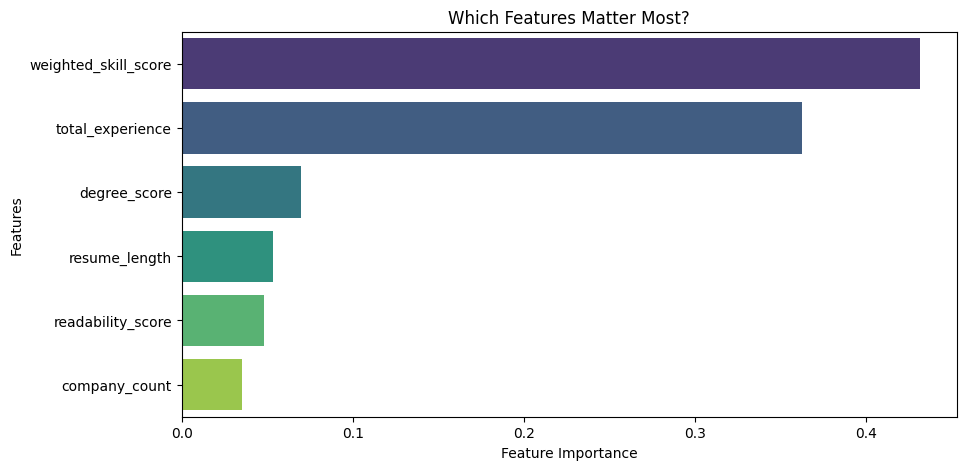

In [40]:
# Get feature importances
importances = rfModel.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x = importance_df['Importance'], y = importance_df['Feature'], palette = 'viridis', hue = None, legend = False)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Which Features Matter Most?")
plt.show()